In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# License: MIT

In [3]:
%matplotlib inline

## Packages

In [4]:
import numpy as np
import scipy as scipy
import scipy.linalg as linalg

import matplotlib.pyplot as plt

import warnings

# Computational Activity 3

## Part one: Constant $p_b$ and $p_\infty$

Define the functions to simulate (positive and negative branch)

In [5]:
def bubble_plus(t,r,params):
    pb = params[0]
    pinf = params[1]
    R0 = params[2]
    rho = params[3]

    drdt = np.sqrt(2*(pb-pinf)/(3*rho)*(1-(R0/r)**3))
    
    return drdt

def bubble_minus(t,r,params):
    pb = params[0]
    pinf = params[1]
    R0 = params[2]
    rho = params[3]

    drdt = -np.sqrt(2*(pb-pinf)/(3*rho)*(1-(R0/r)**3))
    
    return drdt

Set constant parameters

In [6]:
pinf = 101.325
R0 = 1
rho = 1.2

### $p_b<p_\infty$

In [7]:
pb = 101.

# collect parameters into vector
params = np.array([pb,pinf,R0,rho])

# set start and end times
tspan = [0,10]
t_eval = np.linspace(0,10,1000)

# set initial condition as array
delta = 1e-6
r0 = np.array([R0-delta])

solp = scipy.integrate.solve_ivp(lambda t,x:bubble_plus(t,x,params),tspan,r0,t_eval=t_eval)
solm = scipy.integrate.solve_ivp(lambda t,x:bubble_minus(t,x,params),tspan,r0,t_eval=t_eval)

C:\Users\quinncr\AppData\Local\Temp\ipykernel_40416\1033253759.py:7: RuntimeWarning: invalid value encountered in sqrt
  drdt = np.sqrt(2*(pb-pinf)/(3*rho)*(1-(R0/r)**3))
C:\Users\quinncr\AppData\Local\Temp\ipykernel_40416\1033253759.py:17: RuntimeWarning: invalid value encountered in sqrt
  drdt = -np.sqrt(2*(pb-pinf)/(3*rho)*(1-(R0/r)**3))


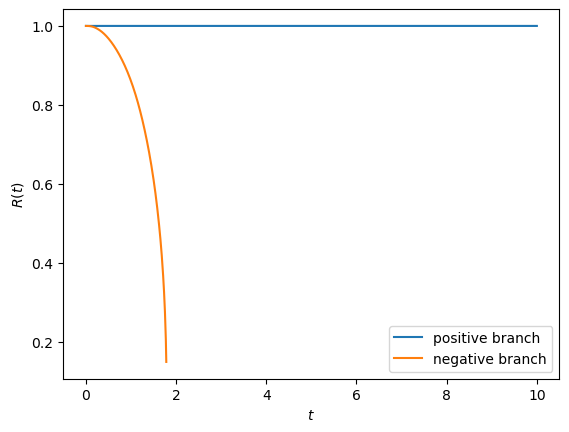

In [8]:
plt.plot(solp.t,solp.y.T)
plt.plot(solm.t,solm.y.T)
plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.legend(['positive branch','negative branch'])
plt.show()

### $p_b=p_\infty$

In [9]:
pb = pinf

# collect parameters into vector
params = np.array([pb,pinf,R0,rho])

# set start and end times
tspan = [0,10]
t_eval = np.linspace(0,10,1000)

# set initial condition as array
delta = 1e-6
r0 = np.array([R0-delta])

solp = scipy.integrate.solve_ivp(lambda t,x:bubble_plus(t,x,params),tspan,r0,t_eval=t_eval)
solm = scipy.integrate.solve_ivp(lambda t,x:bubble_minus(t,x,params),tspan,r0,t_eval=t_eval)

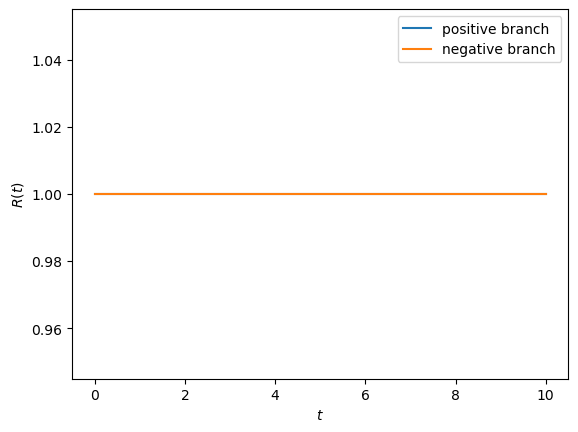

In [10]:
plt.plot(solp.t,solp.y.T)
plt.plot(solm.t,solm.y.T)
plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.legend(['positive branch','negative branch'])
plt.show()

### $p_b>p_\infty$

In [11]:
pb = 101.5

# collect parameters into vector
params = np.array([pb,pinf,R0,rho])

# set start and end times
tspan = [0,10]
t_eval = np.linspace(0,10,1000)

# set initial condition as array
delta = 1e-6
r0 = np.array([R0+delta])

solp = scipy.integrate.solve_ivp(lambda t,x:bubble_plus(t,x,params),tspan,r0,t_eval=t_eval)
solm = scipy.integrate.solve_ivp(lambda t,x:bubble_minus(t,x,params),tspan,r0,t_eval=t_eval)

C:\Users\quinncr\AppData\Local\Temp\ipykernel_40416\1033253759.py:17: RuntimeWarning: invalid value encountered in sqrt
  drdt = -np.sqrt(2*(pb-pinf)/(3*rho)*(1-(R0/r)**3))


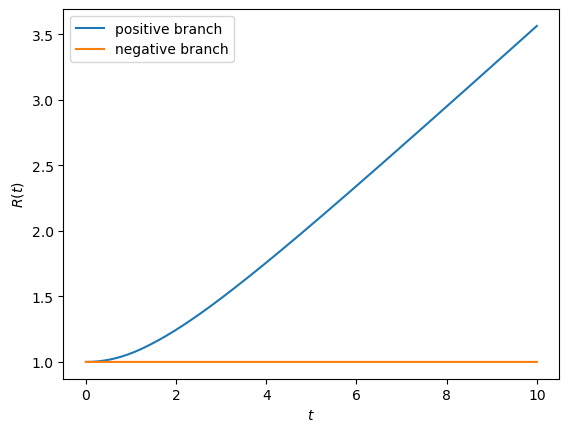

In [12]:
plt.plot(solp.t,solp.y.T)
plt.plot(solm.t,solm.y.T)
plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.legend(['positive branch','negative branch'])
plt.show()

## Part two: Verifying true solution

Define function for system to represent second-order ODE

In [13]:
def bubble_system(t,rv,params):
    pb = params[0]
    pinf = params[1]
    rho = params[2]

    r = rv[0]
    v = rv[1]
    
    drdt = v
    dvdt = (1/r)*((pb-pinf)/(rho)-3/2*v**2)
    
    return np.array([drdt,dvdt])

### $p_b<p_\infty$

In [14]:
pb = 101.

# collect parameters into vector
params = np.array([pb,pinf,rho])

# set start and end times
tspan = [0,10]
t_eval = np.linspace(0,10,1000)

# set initial condition as array
#delta = 1e-6
v0 = 0
rv0 = np.array([R0,v0])

sol_sys = scipy.integrate.solve_ivp(lambda t,x:bubble_system(t,x,params),tspan,rv0,t_eval=t_eval)

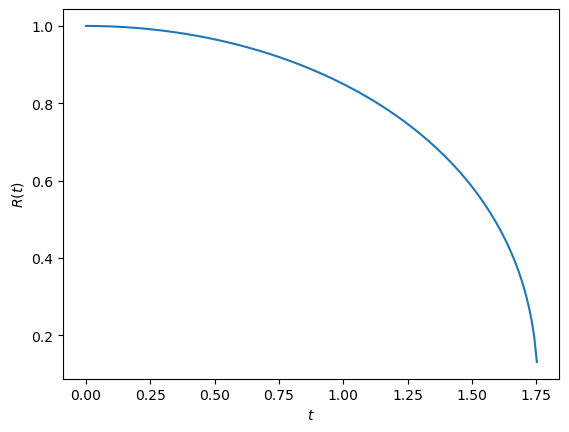

In [15]:
plt.plot(sol_sys.t,sol_sys.y[0].T)
plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.show()

From the above we can ascertain that the negative branch is the correct solution.

### $p_b=p_\infty$

In [17]:
pb = pinf

# collect parameters into vector
params = np.array([pb,pinf,rho])

# set start and end times
tspan = [0,10]
t_eval = np.linspace(0,10,1000)

# set initial condition as array
#delta = 1e-6
v0 = 0
rv0 = np.array([R0,v0])

sol_sys = scipy.integrate.solve_ivp(lambda t,x:bubble_system(t,x,params),tspan,rv0,t_eval=t_eval)

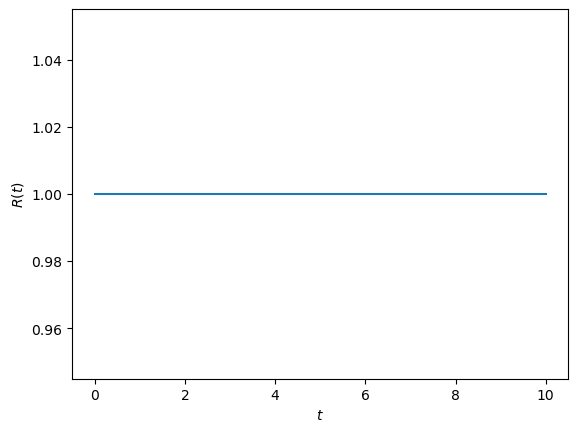

In [18]:
plt.plot(sol_sys.t,sol_sys.y[0].T)
plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.show()

For this case both branches gives the correct solution.

### $p_b>p_\infty$

In [19]:
pb = 101.5

# collect parameters into vector
params = np.array([pb,pinf,rho])

# set start and end times
tspan = [0,10]
t_eval = np.linspace(0,10,1000)

# set initial condition as array
#delta = 1e-6
v0 = 0
rv0 = np.array([R0,v0])

sol_sys = scipy.integrate.solve_ivp(lambda t,x:bubble_system(t,x,params),tspan,rv0,t_eval=t_eval)

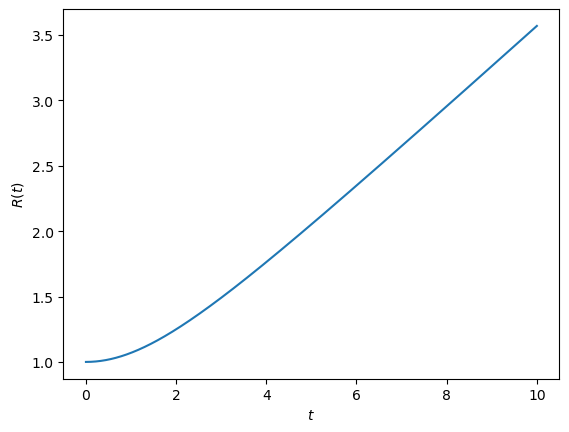

In [21]:
plt.plot(sol_sys.t,sol_sys.y[0].T)
plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.show()

Comparing to the results in Part 1 we see that the positive branch gives the correct solution.

## Part three: Changing environmental pressure

Define system with time-dependent atmospheric pressure

In [22]:
def bubble_system_t(t,rv,params):
    pb = params[0]
    pinf = params[1]
    rho = params[2]
    c = params[3]

    r = rv[0]
    v = rv[1]
    
    drdt = v
    dvdt = (1/r)*((pb-pinf+c*t)/(rho)-3/2*v**2)
    
    return np.array([drdt,dvdt])

### $p_b<p_\infty$

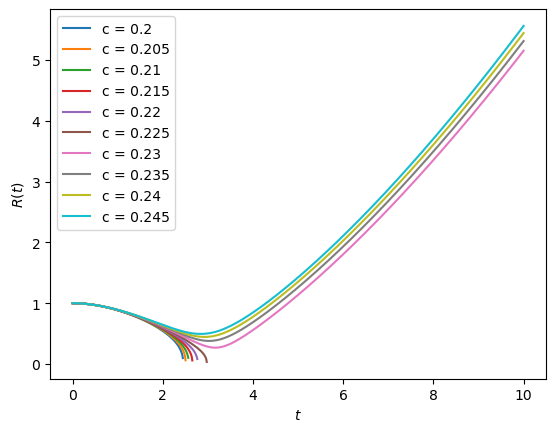

In [23]:
pb = 101.

fig = plt.figure()

cs = np.arange(0.2,0.25,0.005)

labels = []

for ci in cs:
    # collect parameters into vector
    params = np.array([pb,pinf,rho,ci])

    # set start and end times
    tspan = [0,10]
    t_eval = np.linspace(0,10,1000)

    # set initial condition as array
    v0 = 0
    rv0 = np.array([R0,v0])

    sol_sys = scipy.integrate.solve_ivp(lambda t,x:bubble_system_t(t,x,params),tspan,rv0,t_eval=t_eval)

    plt.plot(sol_sys.t,sol_sys.y[0].T)
    labels = np.append(labels,"c = " + str(round(ci,3)))

plt.legend(labels)
plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.show()

The critical rate $c_r$ is between 0.225 and 0.23.